# Non-conserved spins

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import njit

# Parameters
N = 20  # Dimensions of the grid

J = np.array([[0, 1, 1],
              [1, 0, 1],
              [1, 1, 0]])  # Interaction matrix

T = 1.0  # Temperature
steps = 1000  # Monte Carlo steps

# Initialize the grid with random spins
grid = np.random.choice([0, 1, 2], size=(N, N))

def calculate_energy(grid):
    energy = 0
    for i in range(N):
        for j in range(N):
            for di, dj in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
                ni, nj = (i + di) % N, (j + dj) % N
                energy += J[grid[i, j], grid[ni, nj]]
    return energy / 2  # Each interaction is counted twice

# @njit
def monte_carlo_step(grid, T):
    for _ in range(N**2):
        i, j = np.random.randint(0, N, size=2)
        current_state = grid[i, j]
        new_state = np.random.choice([0, 1, 2])
        grid[i, j] = new_state
        dE = calculate_energy(grid) - calculate_energy(np.copy(grid))
        if dE > 0 and np.exp(-dE / T) < np.random.rand():
            grid[i, j] = current_state  # Revert if not accepted




In [6]:
# Perform Monte Carlo simulations
for _ in tqdm(range(steps)):
    monte_carlo_step(grid, T)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [14:26<00:00,  1.15it/s]


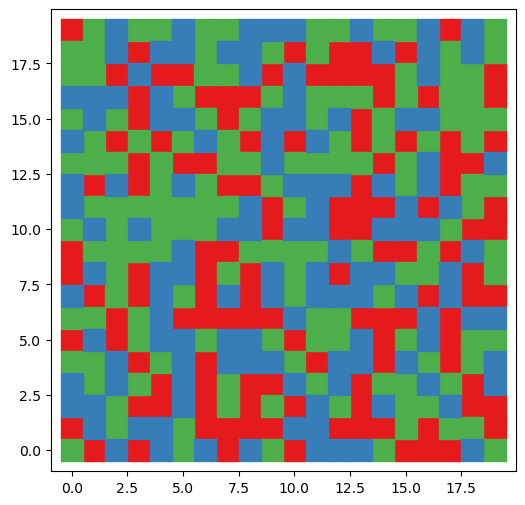

In [26]:
# Visualization
plt.figure(figsize=(6, 6))
colors = ['#e41a1c', '#4daf4a', '#377eb8']
for i in range(3):
    plt.scatter(*np.where(grid == i), color=colors[i], label=f'Spin {i}', s=230, marker='s')
# plt.legend()
plt.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
# from numba import jitclass, int32, float64

# Define the spec for jitclass
# spec = [
#     ('N', int32),
#     ('J', float64[:, :]),
#     ('T', float64),
#     ('steps', int32),
#     ('grid', int32[:, :])
# ]

# @jitclass(spec)
class IsingModel:
    def __init__(self, N=10, J=np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]]), T=1.0, steps=1000):
        self.N = N
        self.J = J
        self.T = T
        self.steps = steps
        self.grid = np.random.choice([0, 1, 2], size=(N, N))
    
    def calculate_energy(self):
        energy = 0
        for i in range(self.N):
            for j in range(self.N):
                for di, dj in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
                    ni, nj = (i + di) % self.N, (j + dj) % self.N
                    energy += self.J[self.grid[i, j], self.grid[ni, nj]]
        return energy / 2  # Each interaction is counted twice

    def monte_carlo_step(self):
        for _ in range(self.N**2):
            i, j = np.random.randint(0, self.N, size=2)
            current_state = self.grid[i, j]
            new_state = np.random.choice([0, 1, 2])
            self.grid[i, j] = new_state
            dE = self.calculate_energy() - self.calculate_energy()  # This part can be optimized further
            if dE > 0 and np.exp(-dE / self.T) < np.random.rand():
                self.grid[i, j] = current_state  # Revert if not accepted
    
    def simulate(self):
        for _ in tqdm(range(self.steps)):
            self.monte_carlo_step()
    
    def visualize(self, colors=['#e41a1c', '#4daf4a', '#377eb8'], size=230, marker='s'):
        plt.figure(figsize=(6, 6))
        colors = colors
        for i in range(3):
            plt.scatter(*np.where(self.grid == i), color=colors[i], label=f'Spin {i}', s=size, marker=marker)
        # plt.legend()
        plt.show()


In [51]:
# Example usage
model = IsingModel(N=12, T=0.3, steps=1000)
model.simulate()

100%|██████████| 1000/1000 [02:39<00:00,  6.27it/s]


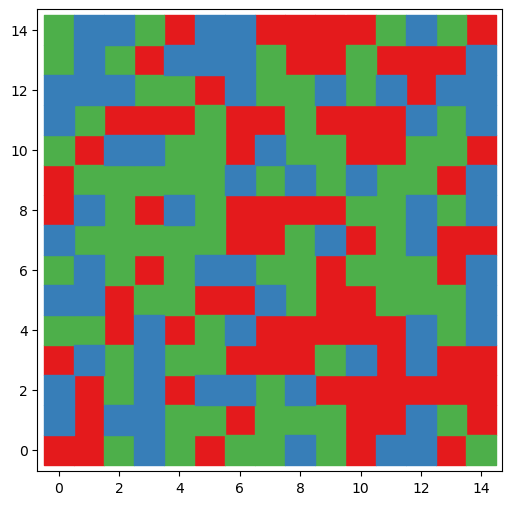

In [45]:
model.visualize(size=480)

In [48]:
model2 = IsingModel(N=15, T=10, steps=500)
model2.simulate()

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [03:07<00:00,  2.67it/s]


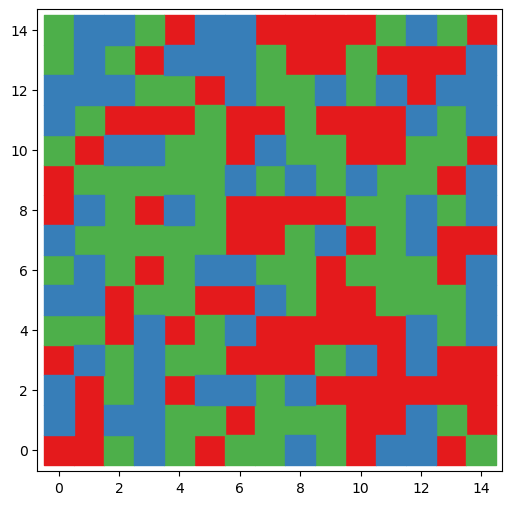

In [50]:
model.visualize(size=480)

# Conserved spins

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class IsingModel:
    def __init__(self, N=10, J=np.array([[0, -1, -1], [-1, 0, -1], [-1, -1, 0]]), T=1.0, steps=1000):
        self.N = N
        self.J = J
        self.T = T
        self.steps = steps
        self.grid = np.random.choice([0, 1, 2], size=(N, N))
    
    def calculate_energy(self):
        energy = 0
        for i in range(self.N):
            for j in range(self.N):
                for di, dj in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
                    ni, nj = (i + di) % self.N, (j + dj) % self.N
                    energy += self.J[self.grid[i, j], self.grid[ni, nj]]
        return energy / 2  # Each interaction is counted twice

    def monte_carlo_step(self):
        for _ in range(self.N**2):
            # Select two different spins at random and swap them
            i1, j1 = np.random.randint(0, self.N, size=2)
            i2, j2 = np.random.randint(0, self.N, size=2)
            while (i1, j1) == (i2, j2):  # Ensure they are different
                i2, j2 = np.random.randint(0, self.N, size=2)
                
            # Swap the spins
            self.grid[i1, j1], self.grid[i2, j2] = self.grid[i2, j2], self.grid[i1, j1]
                
            # Calculate energy difference
            original_energy = self.calculate_energy()
            self.grid[i1, j1], self.grid[i2, j2] = self.grid[i2, j2], self.grid[i1, j1]  # Swap back to calculate original energy
            new_energy = self.calculate_energy()
            dE = new_energy - original_energy
                
            # Accept or reject the swap based on the Metropolis criterion
            if dE <= 0 or np.exp(-dE / self.T) >= np.random.rand():
                self.grid[i1, j1], self.grid[i2, j2] = self.grid[i2, j2], self.grid[i1, j1]  # Accept the swap

    
    def simulate(self):
        for _ in tqdm(range(self.steps)):
            self.monte_carlo_step()
    
    def visualize(self, colors=['#e41a1c', '#4daf4a', '#377eb8'], size=230, marker='s'):
        plt.figure(figsize=(6, 6))
        for i in range(3):
            plt.scatter(*np.where(self.grid == i), color=colors[i], label=f'Spin {i}', s=size, marker=marker)
        plt.show()



In [5]:
# Example usage
model = IsingModel(N=20, T=0.1, steps=1000)
model.simulate()


100%|██████████| 1000/1000 [14:20<00:00,  1.16it/s]


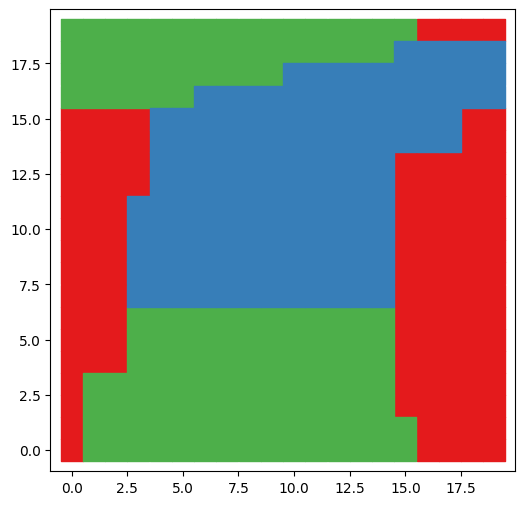

In [15]:
model.visualize(size=230, marker='s')

In [12]:
model2 = IsingModel(N=20, T=3, steps=600)
model2.simulate()


  0%|          | 0/600 [00:00<?, ?it/s]

100%|██████████| 600/600 [08:08<00:00,  1.23it/s]


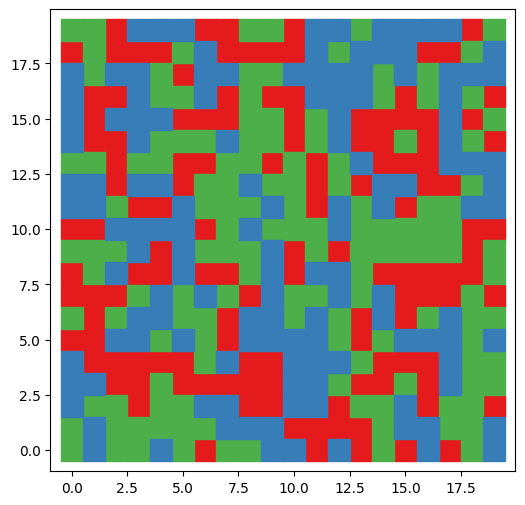

In [14]:
model2.visualize(size=230, marker='s')